In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
#from Layer import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def inverse(x):
    return 1/x
def negexp(x):
    return tf.exp(-x)
def exp(x):
    return tf.exp(x)
def relu(x):
    if(x>0):
        return x
    else:
        return 0
def log(x):
    return -tf.experimental.numpy.log10(x)
def sqx(x):
    return x**2
def sq3(x):
    return x**3
def taufn(x):
    return 0.2*tf.sigmoid(x)

def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)


In [3]:
logcosh(5,6)

0.4337808304830271

In [33]:
class LayerClass(tf.keras.layers.Layer):
    def __init__(self,units,act=None,name=None,bias=False,kernel_initializer='random',bias_initializer='random',w_seed=None,weights_T=True):
        super(LayerClass,self).__init__(name=name)
        self.units = units
        self.activation = act
        self.bias= bias
        self.bias_initializer=bias_initializer
        self.kernel_initializer=kernel_initializer
        self.w_seed = w_seed
        self.weights_T = weights_T
        #print('Layer1 init checkpoint')
        
    def build(self,input_shape):
        
        if len(input_shape)==2:
            self.shape=input_shape[1]
        else:
            self.shape=1
        if self.kernel_initializer == 'random':
            w_init = tf.random_uniform_initializer(-0.1,0.1,seed = self.w_seed)
        else:
            w_init = tf.ones_initializer()
        if self.kernel_initializer == 'negones':
            self.w = tf.Variable(initial_value=-w_init(shape=(self.shape, self.units), dtype="float32"),trainable=self.weights_T)
        else:
            self.w = tf.Variable(initial_value=w_init(shape=(self.shape, self.units), dtype="float32"),trainable=self.weights_T)
        if self.bias_initializer == 'zeros':
            b_init = tf.zeros_initializer()
        elif self.bias_initializer == 'ones':
            b_init = tf.ones_initializer()
        else:
            b_init = tf.random_uniform_initializer(0,1)
        self.b = tf.Variable(initial_value=b_init(shape=(self.units,), dtype="float32"), trainable=self.bias)

    def call(self,inputs):
        
        if self.shape ==1:
            inputs = tf.reshape(inputs,shape=[inputs.shape[0],1])
        out = tf.matmul(inputs,self.w) + self.b
        if self.activation!=None:
            out = self.activation(out)
        return out

ifile = pd.read_csv('drive/MyDrive/rework hiwi/input_scaled.csv')
#ifile = pd.read_excel('drive/MyDrive/rework hiwi/inputs.xlsx')

ofile = pd.read_excel('drive/MyDrive/rework hiwi/output_cc.xlsx')

In [6]:
ifile = pd.read_csv('input_scaled.csv')
#ifile = pd.read_excel('drive/MyDrive/rework hiwi/inputs.xlsx')

ofile = pd.read_excel('output_cc.xlsx')

In [7]:
ifile

,id,glass_name,glass_tag,Temperature,Density (g/cc),Youngs Modulus E (kN/mm2 or GPa),Poisson's Ratio,eta_inf,Tg,m
0,1,xensation3D,1,0.298361,0.107407,0.398482,0.194175,9.998307e-01,0.225497,0.066539
1,2,xensation3D,1,0.344262,0.107407,0.398482,0.194175,9.998307e-01,0.225497,0.066539
2,3,xensation3D,1,0.409836,0.107407,0.398482,0.194175,9.998307e-01,0.225497,0.066539
3,4,xensation3D,1,0.436066,0.107407,0.398482,0.194175,9.998307e-01,0.225497,0.066539
4,5,xensation3D,1,0.475410,0.107407,0.398482,0.194175,9.998307e-01,0.225497,0.066539
...,...,...,...,...,...,...,...,...,...,...
330,331,K-CSK120,22,0.203279,0.296296,0.588235,0.485437,5.575007e-10,0.086914,0.396392
331,332,K-CSK120,22,0.219672,0.296296,0.588235,0.485437,5.575007e-10,0.086914,0.396392
332,333,K-CSK120,22,0.236066,0.296296,0.588235,0.485437,5.575007e-10,0.086914,0.396392
333,334,K-CSK120,22,0.252459,0.296296,0.588235,0.485437,5.575007e-10,0.086914,0.396392


In [8]:
id_raw = ifile["id"]
x_raw = ifile.drop(columns = ['id','glass_name','glass_tag'])
x_raw['t'] = 0
y_raw = ofile.drop(columns = ['id','glass_name','glass_tag','Temperature'])
x_raw = x_raw.to_numpy()
y_raw = y_raw.to_numpy()
y_raw= 10**(-y_raw)*1e9
from sklearn.model_selection import train_test_split

id_train, id_test = train_test_split(id_raw, test_size = 0.2, random_state = 11)
xr_train, xr_test, yr_train, yr_test = train_test_split(x_raw,y_raw, test_size = 0.2, random_state=11,shuffle=True)

In [9]:
ofile.min()

id                   1
glass_name        B270
glass_tag            1
Temperature        515
data_1         8.58014
                ...   
data_936       5.07434
data_937       5.07408
data_938       5.07383
data_939       5.07358
data_940       5.07332
Length: 944, dtype: object

In [10]:
#batch = 32
x_train = np.zeros([20*xr_train.shape[0],xr_train.shape[1]])
y_train = np.zeros(xr_train.shape[0]*20)
x_p = np.zeros_like(x_raw[0:1,:])
y_p = np.zeros_like(y_raw[0:1,:])
for j in range(xr_train.shape[0]):
    for i in range(20):
        x_p = x_raw[j:j+1,:]
        y_p = y_raw[j:j+1,:]
        x_train[j*20+i,:]= x_p
        x_train[j*20+i,-1] = i*47
        y_train[j*20+i] = y_p[0,i*47]
        
x_tr, x_val, y_tr, y_val = train_test_split(x_train,y_train, test_size = 0.2, random_state=0,shuffle=True)

# tr_size = int(x_tr.shape[0]/batch)*batch
# x_tr = x_tr[0:tr_size,:]
# y_tr = y_tr[0:tr_size]
x_tr = tf.convert_to_tensor(x_tr)
y_tr= tf.convert_to_tensor(y_tr)
# val_size = int(x_val.shape[0]/batch)*batch
# x_val = x_val[0:val_size,:]
# y_val = y_val[0:val_size]

x_val = tf.convert_to_tensor(x_val)
y_val= tf.convert_to_tensor(y_val) 

In [11]:
#Burgers equation is added only to the loss
class ModelClass(tf.keras.Model):
    def __init__(self,name=None):
        super(ModelClass,self).__init__(name=name)

        self.prelayer1 = LayerClass(10,act=None,name='prelayer1',bias=True)
        self.prelayer2 = LayerClass(10,act=sqx,name='prelayer2',bias=True)
        self.prelayer3 = LayerClass(10,act=sqx,name='prelayer3',bias=True)
        self.prelayer4 = LayerClass(10,act=sqx,name='prelayer4',bias=True)
        self.prelayer6 = LayerClass(10,act=sqx,name='prelayer4',bias=True)
        self.prelayer7 = LayerClass(10,act=sqx,name='prelayer4',bias=True)
        self.prelayer5 = LayerClass(3,act =sqx,name= 'prelayer5',bias=True)
        
    def call(self,input):
        
        #self.time = input[:,-1]
        x = self.prelayer1(input[:,0:7])

        x = self.prelayer2(x)
        x = self.prelayer3(x)
        x = self.prelayer4(x)
       # x = self.prelayer6(x)
        #x = self.prelayer7(x)
        x = self.prelayer5(x)
        x = tf.concat([x,input[:,7:8]],axis=1)
        return x
    
    def train_step(self, data):
    
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            #print(y_pred)
            e2 =y_pred[:,0]
            n1 = y_pred[:,1]
            n2 = y_pred[:,2]
            t = y_pred[:,-1]
            
            eqn = (1-tf.exp(-e2*t/n2))/e2+t/n1
            # Compute the loss value
             # (the loss function is configured in `compile()`)
            loss = self.compiled_loss(y, eqn)
#             print('e2',e2)
#             print('n1',n1)
#             print('n2',n2)
#             print('eqn',eqn)
#             print('loss',loss)
         # Compute gradients
        trainable_vars = self.trainable_weights
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
       
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, eqn)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}
    
    def test_step(self, data):
        
        # Unpack the data
        x, y = data
        # Compute predictions
        y_pred = self(x, training=False)
        e2 =y_pred[:,0]
        n1 = y_pred[:,1]
        n2 = y_pred[:,2]
        t = y_pred[:,-1]
            
        eqn = (1-tf.exp(-e2*t/n2))/e2+t/n1
        # Updates the metrics tracking the loss
        self.compiled_loss(y, eqn)
        # Update the metrics.
        self.compiled_metrics.update_state(y, eqn)
        # Return a dict mapping metric names to current value.
        # Note that it will include the loss (tracked in self.metrics).
        return {m.name: m.result() for m in self.metrics}

    def predict(self,input):
        y_inter = self(input)
        e2 = y_inter[:,0]
        n1 = y_inter[:,1]
        n2 = y_inter[:,2]
        t = y_inter[:,-1]
        y_pred = (1-tf.exp(-e2*t/n2))/e2+t/n1
        
        return y_pred

In [16]:
callbacks = tf.keras.callbacks.ModelCheckpoint('./tmp','mse',save_best_only=True,save_weights_only=True)

In [ ]:
# model = ModelClass('Pinn_para')
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.log_cosh,metrics= ['mse'],run_eagerly=True)
# hist = model.fit(x_tr,y_tr,epochs=50,validation_data=(x_val,y_val),batch_size=512,shuffle=True,callbacks=callbacks)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),loss=tf.keras.losses.log_cosh,metrics= ['mse'],run_eagerly=True)
hist = model.fit(x_tr,y_tr,epochs=1000,validation_data=(x_val,y_val),batch_size=512,shuffle=True,callbacks=callbacks)

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),loss=tf.keras.losses.log_cosh,metrics= ['mse'],run_eagerly=True)
# hist = model.fit(x_tr,y_tr,epochs=1500,validation_data=(x_val,y_val),batch_size=512,shuffle=True,callbacks=callbacks)

In [ ]:
model3 = ModelClass('Pinn_para')
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.log_cosh,metrics= ['mse'],run_eagerly=True)
hist = model3.fit(x_tr,y_tr,epochs=1500,validation_data=(x_val,y_val),batch_size=512,shuffle=True,callbacks=callbacks)

In [93]:
#Burgers equation is added only to the loss
class ModelClass2(tf.keras.Model):
    def __init__(self,name=None):
        super(ModelClass2,self).__init__(name=name)

        self.prelayer1 = LayerClass(50,act=tf.nn.elu,name='prelayer1',bias=True)
        self.prelayer2 = LayerClass(50,act=tf.nn.elu,name='prelayer2',bias=True)
        self.prelayer3 = LayerClass(50,act=negexp,name='prelyer3',bias=True)
        self.prelayer3b = LayerClass(50,act=tf.nn.elu,name='prelayer3',bias=True)
        self.prelayer6 = LayerClass(50,act=tf.nn.elu,name='prelayer2',bias=True)
        self.prelayer4 = LayerClass(50,act= tf.nn.elu,name='prelayer4',bias=True)
        self.prelayer5 = LayerClass(3,act = tf.nn.elu,name= 'prelayer5',bias=True)
        
    def call(self,input):
        
        #self.time = input[:,-1]
        x = self.prelayer1(input[:,0:7])
        x = self.prelayer2(x)
        y = self.prelayer3b(x)
        x = self.prelayer3(x)
        
        x = tf.concat([x,y],axis=1)
        x = self.prelayer6(x)
        x = self.prelayer4(x)
        x = self.prelayer5(x)
        x = tf.concat([x,input[:,7:8]],axis=1)
        return x
    
    def train_step(self, data):
    
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            #print(y_pred)
            e2 =y_pred[:,0]
            n1 = y_pred[:,1]
            n2 = y_pred[:,2]
            t = y_pred[:,-1]
            
            eqn = (1-tf.exp(-e2*t/n2))/e2+t/n1
            # Compute the loss value
             # (the loss function is configured in `compile()`)
            loss = self.compiled_loss(y, eqn)
#             print('e2',e2)
#             print('n1',n1)
#             print('n2',n2)
#             print('eqn',eqn)
#             print('loss',loss)
         # Compute gradients
        trainable_vars = self.trainable_weights
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
       
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, eqn)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}
    
    def test_step(self, data):
        
        # Unpack the data
        x, y = data
        # Compute predictions
        y_pred = self(x, training=False)
        e2 =y_pred[:,0]
        n1 = y_pred[:,1]
        n2 = y_pred[:,2]
        t = y_pred[:,-1]
            
        eqn = (1-tf.exp(-e2*t/n2))/e2+t/n1
        # Updates the metrics tracking the loss
        self.compiled_loss(y, eqn)
        # Update the metrics.
        self.compiled_metrics.update_state(y, eqn)
        # Return a dict mapping metric names to current value.
        # Note that it will include the loss (tracked in self.metrics).
        return {m.name: m.result() for m in self.metrics}

    def predict(self,input):
        y_inter = self(input)
        e2 = y_inter[:,0]
        n1 = y_inter[:,1]
        n2 = y_inter[:,2]
        t = y_inter[:,-1]
        y_pred = (1-tf.exp(-e2*t/n2))/e2+t/n1
        
        return y_pred

In [95]:
model2 = ModelClass2('Pinn_para')
model2.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.001),loss = tf.keras.losses.log_cosh,metrics= ['mse'],run_eagerly=True)
hist = model2.fit(x_tr,y_tr,epochs=10000,validation_data=(x_val,y_val),batch_size=512,shuffle=True)

# model2.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.00001),loss = tf.keras.losses.log_cosh,metrics= ['mse'],run_eagerly=True)
# hist = model2.fit(x_tr,y_tr,epochs=15000,validation_data=(x_val,y_val),batch_size=512,shuffle=True)

Epoch 1/10000
9/9 [==============================] - 0s 21ms/step - loss: 563.0125 - mse: 687160.4375 - val_loss: 559.8908 - val_mse: 705579.3125
Epoch 2/10000
9/9 [==============================] - 0s 19ms/step - loss: 559.2975 - mse: 698035.2500 - val_loss: 556.8316 - val_mse: 702756.5625
Epoch 3/10000
9/9 [==============================] - 0s 19ms/step - loss: 556.5163 - mse: 692487.2500 - val_loss: 554.4129 - val_mse: 700526.3125
Epoch 4/10000
9/9 [==============================] - 0s 19ms/step - loss: 554.2557 - mse: 688859.4375 - val_loss: 552.3789 - val_mse: 698645.9375
Epoch 5/10000
9/9 [==============================] - 0s 19ms/step - loss: 552.3184 - mse: 699723.5000 - val_loss: 550.5720 - val_mse: 696971.0000
Epoch 6/10000
9/9 [==============================] - 0s 20ms/step - loss: 550.5791 - mse: 685588.5000 - val_loss: 548.9399 - val_mse: 695450.6875
Epoch 7/10000
9/9 [==============================] - 0s 20ms/step - loss: 548.9890 - mse: 712435.2500 - val_loss: 547.4223 -

Epoch 57/10000
9/9 [==============================] - 0s 20ms/step - loss: 491.4150 - mse: 624352.5625 - val_loss: 491.6673 - val_mse: 644670.9375
Epoch 58/10000
9/9 [==============================] - 0s 19ms/step - loss: 490.3649 - mse: 662322.5625 - val_loss: 490.6608 - val_mse: 643905.5000
Epoch 59/10000
9/9 [==============================] - 0s 20ms/step - loss: 489.3221 - mse: 642468.3750 - val_loss: 489.6547 - val_mse: 643146.0000
Epoch 60/10000
9/9 [==============================] - 0s 19ms/step - loss: 488.2790 - mse: 686474.5625 - val_loss: 488.6631 - val_mse: 642401.8125
Epoch 61/10000
9/9 [==============================] - 0s 19ms/step - loss: 487.2491 - mse: 633389.5625 - val_loss: 487.6637 - val_mse: 641657.5625
Epoch 62/10000
9/9 [==============================] - 0s 19ms/step - loss: 486.2132 - mse: 661215.1250 - val_loss: 486.6884 - val_mse: 640938.1875
Epoch 63/10000
9/9 [==============================] - 0s 20ms/step - loss: 485.2014 - mse: 645998.6250 - val_loss: 485

9/9 [==============================] - 0s 20ms/step - loss: 403.3836 - mse: 614373.3750 - val_loss: 405.5410 - val_mse: 602910.8125
Epoch 168/10000
9/9 [==============================] - 0s 20ms/step - loss: 402.7103 - mse: 611394.8750 - val_loss: 404.8878 - val_mse: 602822.5625
Epoch 169/10000
9/9 [==============================] - 0s 20ms/step - loss: 402.0424 - mse: 599161.0625 - val_loss: 404.2321 - val_mse: 602738.7500
Epoch 170/10000
9/9 [==============================] - 0s 20ms/step - loss: 401.3739 - mse: 617850.6250 - val_loss: 403.5788 - val_mse: 602660.1250
Epoch 171/10000
9/9 [==============================] - 0s 19ms/step - loss: 400.7100 - mse: 628583.3125 - val_loss: 402.9222 - val_mse: 602585.9375
Epoch 172/10000
9/9 [==============================] - 0s 19ms/step - loss: 400.0441 - mse: 633090.5000 - val_loss: 402.2627 - val_mse: 602516.4375
Epoch 173/10000
9/9 [==============================] - 0s 19ms/step - loss: 399.3769 - mse: 665581.2500 - val_loss: 401.5973 - v

9/9 [==============================] - 0s 20ms/step - loss: 347.6371 - mse: 618229.8750 - val_loss: 349.8773 - val_mse: 618720.5625
Epoch 278/10000
9/9 [==============================] - 0s 19ms/step - loss: 347.3203 - mse: 602267.6875 - val_loss: 349.5478 - val_mse: 619040.8125
Epoch 279/10000
9/9 [==============================] - 0s 19ms/step - loss: 346.9944 - mse: 627977.8750 - val_loss: 349.2240 - val_mse: 619358.8125
Epoch 280/10000
9/9 [==============================] - 0s 19ms/step - loss: 346.6762 - mse: 694747.0625 - val_loss: 348.9193 - val_mse: 619661.4375
Epoch 281/10000
9/9 [==============================] - 0s 19ms/step - loss: 346.3762 - mse: 641865.9375 - val_loss: 348.5992 - val_mse: 619984.1875
Epoch 282/10000
9/9 [==============================] - 0s 19ms/step - loss: 346.0652 - mse: 654725.4375 - val_loss: 348.2900 - val_mse: 620300.5000
Epoch 283/10000
9/9 [==============================] - 0s 19ms/step - loss: 345.7646 - mse: 630384.0625 - val_loss: 347.9734 - v

9/9 [==============================] - 0s 20ms/step - loss: 324.1484 - mse: 687975.6875 - val_loss: 324.6735 - val_mse: 676655.5625
Epoch 388/10000
9/9 [==============================] - 0s 19ms/step - loss: 324.1305 - mse: 692347.8750 - val_loss: 324.6497 - val_mse: 676997.5625
Epoch 389/10000
9/9 [==============================] - 0s 20ms/step - loss: 324.1135 - mse: 702999.2500 - val_loss: 324.6276 - val_mse: 677315.2500
Epoch 390/10000
9/9 [==============================] - 0s 20ms/step - loss: 324.1000 - mse: 701977.5000 - val_loss: 324.6078 - val_mse: 677599.0000
Epoch 391/10000
9/9 [==============================] - 0s 19ms/step - loss: 324.0820 - mse: 705105.7500 - val_loss: 324.5883 - val_mse: 677875.8750
Epoch 392/10000
9/9 [==============================] - 0s 19ms/step - loss: 324.0684 - mse: 702517.3125 - val_loss: 324.5689 - val_mse: 678156.1875
Epoch 393/10000
9/9 [==============================] - 0s 20ms/step - loss: 324.0540 - mse: 689089.5625 - val_loss: 324.5475 - v

9/9 [==============================] - 0s 19ms/step - loss: 323.6793 - mse: 749024.6875 - val_loss: 324.1020 - val_mse: 681896.0625
Epoch 498/10000
9/9 [==============================] - 0s 19ms/step - loss: 323.6767 - mse: 703292.0625 - val_loss: 324.0995 - val_mse: 681894.1875
Epoch 499/10000
9/9 [==============================] - 0s 20ms/step - loss: 323.6747 - mse: 728818.7500 - val_loss: 324.0978 - val_mse: 681871.0000
Epoch 500/10000
9/9 [==============================] - 0s 20ms/step - loss: 323.6733 - mse: 699149.4375 - val_loss: 324.0961 - val_mse: 681848.9375
Epoch 501/10000
9/9 [==============================] - 0s 19ms/step - loss: 323.6703 - mse: 727414.4375 - val_loss: 324.0941 - val_mse: 681833.7500
Epoch 502/10000
9/9 [==============================] - 0s 19ms/step - loss: 323.6682 - mse: 710089.2500 - val_loss: 324.0916 - val_mse: 681835.3125
Epoch 503/10000
9/9 [==============================] - 0s 19ms/step - loss: 323.6656 - mse: 704968.0625 - val_loss: 324.0890 - v

9/9 [==============================] - 0s 19ms/step - loss: 323.4289 - mse: 702021.3125 - val_loss: 323.8581 - val_mse: 681010.8750
Epoch 608/10000
9/9 [==============================] - 0s 19ms/step - loss: 323.4262 - mse: 711803.0000 - val_loss: 323.8558 - val_mse: 681003.0625
Epoch 609/10000
9/9 [==============================] - 0s 20ms/step - loss: 323.4242 - mse: 710722.7500 - val_loss: 323.8540 - val_mse: 680981.2500
Epoch 610/10000
9/9 [==============================] - 0s 20ms/step - loss: 323.4218 - mse: 692909.8125 - val_loss: 323.8514 - val_mse: 680985.5625
Epoch 611/10000
9/9 [==============================] - 0s 21ms/step - loss: 323.4194 - mse: 714105.7500 - val_loss: 323.8492 - val_mse: 680972.6875
Epoch 612/10000
9/9 [==============================] - 0s 21ms/step - loss: 323.4171 - mse: 681745.1875 - val_loss: 323.8465 - val_mse: 680979.2500
Epoch 613/10000
9/9 [==============================] - 0s 20ms/step - loss: 323.4149 - mse: 711710.1875 - val_loss: 323.8443 - v

9/9 [==============================] - 0s 20ms/step - loss: 323.1566 - mse: 693374.8125 - val_loss: 323.5960 - val_mse: 679927.8750
Epoch 718/10000
9/9 [==============================] - 0s 20ms/step - loss: 323.1541 - mse: 685690.6875 - val_loss: 323.5935 - val_mse: 679909.8125
Epoch 719/10000
9/9 [==============================] - 0s 20ms/step - loss: 323.1513 - mse: 704266.5000 - val_loss: 323.5909 - val_mse: 679900.8125
Epoch 720/10000
9/9 [==============================] - 0s 20ms/step - loss: 323.1484 - mse: 696704.5625 - val_loss: 323.5881 - val_mse: 679893.0000
Epoch 721/10000
9/9 [==============================] - 0s 20ms/step - loss: 323.1457 - mse: 714553.9375 - val_loss: 323.5850 - val_mse: 679896.5000
Epoch 722/10000
9/9 [==============================] - 0s 19ms/step - loss: 323.1431 - mse: 686093.3125 - val_loss: 323.5825 - val_mse: 679881.5625
Epoch 723/10000
9/9 [==============================] - 0s 19ms/step - loss: 323.1400 - mse: 714589.7500 - val_loss: 323.5794 - v

9/9 [==============================] - 0s 19ms/step - loss: 322.8253 - mse: 697525.8750 - val_loss: 323.2714 - val_mse: 678715.4375
Epoch 828/10000
9/9 [==============================] - 0s 19ms/step - loss: 322.8223 - mse: 685263.3750 - val_loss: 323.2679 - val_mse: 678710.6875
Epoch 829/10000
9/9 [==============================] - 0s 19ms/step - loss: 322.8189 - mse: 735058.5625 - val_loss: 323.2646 - val_mse: 678702.0000
Epoch 830/10000
9/9 [==============================] - 0s 19ms/step - loss: 322.8153 - mse: 746299.4375 - val_loss: 323.2615 - val_mse: 678680.3125
Epoch 831/10000
9/9 [==============================] - 0s 19ms/step - loss: 322.8120 - mse: 707062.0000 - val_loss: 323.2580 - val_mse: 678670.9375
Epoch 832/10000
9/9 [==============================] - 0s 19ms/step - loss: 322.8086 - mse: 742145.1875 - val_loss: 323.2545 - val_mse: 678667.7500
Epoch 833/10000
9/9 [==============================] - 0s 19ms/step - loss: 322.8052 - mse: 690287.2500 - val_loss: 323.2515 - v

9/9 [==============================] - 0s 19ms/step - loss: 322.4153 - mse: 707065.7500 - val_loss: 322.8682 - val_mse: 677142.7500
Epoch 938/10000
9/9 [==============================] - 0s 20ms/step - loss: 322.4108 - mse: 702685.3125 - val_loss: 322.8640 - val_mse: 677119.8125
Epoch 939/10000
9/9 [==============================] - 0s 19ms/step - loss: 322.4068 - mse: 747879.7500 - val_loss: 322.8601 - val_mse: 677087.8125
Epoch 940/10000
9/9 [==============================] - 0s 19ms/step - loss: 322.4023 - mse: 760596.4375 - val_loss: 322.8559 - val_mse: 677078.2500
Epoch 941/10000
9/9 [==============================] - 0s 19ms/step - loss: 322.3984 - mse: 692538.8125 - val_loss: 322.8520 - val_mse: 677050.0000
Epoch 942/10000
9/9 [==============================] - 0s 20ms/step - loss: 322.3942 - mse: 685956.0625 - val_loss: 322.8477 - val_mse: 677048.1875
Epoch 943/10000
9/9 [==============================] - 0s 19ms/step - loss: 322.3902 - mse: 698977.5625 - val_loss: 322.8434 - v

9/9 [==============================] - 0s 20ms/step - loss: 321.8852 - mse: 711239.0000 - val_loss: 322.3465 - val_mse: 674835.7500
Epoch 1048/10000
9/9 [==============================] - 0s 19ms/step - loss: 321.8789 - mse: 677635.0000 - val_loss: 322.3410 - val_mse: 674815.2500
Epoch 1049/10000
9/9 [==============================] - 0s 19ms/step - loss: 321.8742 - mse: 706806.0000 - val_loss: 322.3354 - val_mse: 674801.5000
Epoch 1050/10000
9/9 [==============================] - 0s 19ms/step - loss: 321.8685 - mse: 705991.1875 - val_loss: 322.3299 - val_mse: 674775.5000
Epoch 1051/10000
9/9 [==============================] - 0s 19ms/step - loss: 321.8625 - mse: 692418.4375 - val_loss: 322.3244 - val_mse: 674759.0625
Epoch 1052/10000
9/9 [==============================] - 0s 19ms/step - loss: 321.8571 - mse: 734322.6875 - val_loss: 322.3190 - val_mse: 674715.0000
Epoch 1053/10000
9/9 [==============================] - 0s 19ms/step - loss: 321.8512 - mse: 709225.1250 - val_loss: 322.31

Epoch 1102/10000
9/9 [==============================] - 0s 20ms/step - loss: 321.5416 - mse: 708585.3125 - val_loss: 322.0128 - val_mse: 672941.3750
Epoch 1103/10000
9/9 [==============================] - 0s 20ms/step - loss: 321.5349 - mse: 697888.2500 - val_loss: 322.0062 - val_mse: 672898.9375TA: 0s - loss: 323.8365 - mse: 707233.25
Epoch 1104/10000
9/9 [==============================] - 0s 19ms/step - loss: 321.5279 - mse: 705060.5625 - val_loss: 321.9997 - val_mse: 672858.0625
Epoch 1105/10000
9/9 [==============================] - 0s 19ms/step - loss: 321.5214 - mse: 685094.2500 - val_loss: 321.9930 - val_mse: 672820.8750
Epoch 1106/10000
9/9 [==============================] - 0s 20ms/step - loss: 321.5143 - mse: 708006.8125 - val_loss: 321.9865 - val_mse: 672780.9375
Epoch 1107/10000
9/9 [==============================] - 0s 19ms/step - loss: 321.5076 - mse: 681211.2500 - val_loss: 321.9796 - val_mse: 672747.3125
Epoch 1108/10000
9/9 [==============================] - 0s 19ms/st

9/9 [==============================] - 0s 19ms/step - loss: 320.6368 - mse: 697946.8750 - val_loss: 321.1123 - val_mse: 667818.8125
Epoch 1212/10000
9/9 [==============================] - 0s 19ms/step - loss: 320.6276 - mse: 715301.7500 - val_loss: 321.1025 - val_mse: 667780.1875
Epoch 1213/10000
9/9 [==============================] - 0s 19ms/step - loss: 320.6173 - mse: 695853.7500 - val_loss: 321.0928 - val_mse: 667720.8750
Epoch 1214/10000
9/9 [==============================] - 0s 20ms/step - loss: 320.6074 - mse: 688512.0625 - val_loss: 321.0830 - val_mse: 667700.2500
Epoch 1215/10000
9/9 [==============================] - 0s 20ms/step - loss: 320.5981 - mse: 706008.5625 - val_loss: 321.0734 - val_mse: 667654.3750
Epoch 1216/10000
9/9 [==============================] - 0s 19ms/step - loss: 320.5880 - mse: 701628.9375 - val_loss: 321.0636 - val_mse: 667598.3750
Epoch 1217/10000
9/9 [==============================] - 0s 20ms/step - loss: 320.5784 - mse: 700438.2500 - val_loss: 321.05

9/9 [==============================] - 0s 19ms/step - loss: 320.0249 - mse: 735908.2500 - val_loss: 320.5073 - val_mse: 664607.0000
Epoch 1267/10000
9/9 [==============================] - 0s 19ms/step - loss: 320.0101 - mse: 687474.4375 - val_loss: 320.4936 - val_mse: 664512.3125
Epoch 1268/10000
9/9 [==============================] - 0s 19ms/step - loss: 319.9955 - mse: 682414.8750 - val_loss: 320.4794 - val_mse: 664411.3125
Epoch 1269/10000
9/9 [==============================] - 0s 19ms/step - loss: 319.9812 - mse: 694472.3125 - val_loss: 320.4653 - val_mse: 664348.5000
Epoch 1270/10000
9/9 [==============================] - 0s 19ms/step - loss: 319.9673 - mse: 691595.1250 - val_loss: 320.4508 - val_mse: 664234.0625
Epoch 1271/10000
9/9 [==============================] - 0s 19ms/step - loss: 319.9512 - mse: 692949.1875 - val_loss: 320.4356 - val_mse: 664161.8750
Epoch 1272/10000
9/9 [==============================] - 0s 20ms/step - loss: 319.9363 - mse: 700663.6875 - val_loss: 320.42

Epoch 1320/10000
9/9 [==============================] - 0s 20ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 1321/10000
9/9 [==============================] - 0s 19ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 1322/10000
9/9 [==============================] - 0s 20ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 1323/10000
9/9 [==============================] - 0s 20ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 1324/10000
9/9 [==============================] - 0s 20ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 1325/10000
9/9 [==============================] - 0s 20ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 1326/10000
9/9 [==============================] - 0s 20ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 1327/10000
9/9 [==============================] - 0s 20ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 1328/10000

KeyboardInterrupt: 

In [ ]:
model4 = ModelClass('Pinn_para')
model4.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01),loss = tf.keras.losses.log_cosh,metrics= ['mse'],run_eagerly=True)
hist = model4.fit(x_train,y_train,epochs=15000,batch_size=512,shuffle=True)

Epoch 1/15000
11/11 [==============================] - 0s 11ms/step - loss: 2679.4675 - mse: 10305135.0000
Epoch 2/15000
11/11 [==============================] - 0s 11ms/step - loss: 2669.4705 - mse: 10220237.0000
Epoch 3/15000
11/11 [==============================] - 0s 11ms/step - loss: 2659.3320 - mse: 10156276.0000
Epoch 4/15000
11/11 [==============================] - 0s 11ms/step - loss: 2649.0994 - mse: 10133225.0000
Epoch 5/15000
11/11 [==============================] - 0s 11ms/step - loss: 2638.8057 - mse: 10021705.0000
Epoch 6/15000
11/11 [==============================] - 0s 11ms/step - loss: 2628.4641 - mse: 9862154.0000
Epoch 7/15000
11/11 [==============================] - 0s 11ms/step - loss: 2618.1436 - mse: 9845604.0000
Epoch 8/15000
11/11 [==============================] - 0s 11ms/step - loss: 2607.7671 - mse: 9816143.0000
Epoch 9/15000
11/11 [==============================] - 0s 11ms/step - loss: 2597.3149 - mse: 9673823.0000A: 0s - loss: 2596.0520 - mse: 9709000.0
E

Epoch 153/15000
11/11 [==============================] - 0s 11ms/step - loss: 323.6389 - mse: 738154.0625
Epoch 154/15000
11/11 [==============================] - 0s 11ms/step - loss: 323.6337 - mse: 696923.8125
Epoch 155/15000
11/11 [==============================] - 0s 11ms/step - loss: 323.6296 - mse: 702888.7500
Epoch 156/15000
11/11 [==============================] - 0s 11ms/step - loss: 323.6251 - mse: 698352.8125
Epoch 157/15000
11/11 [==============================] - 0s 11ms/step - loss: 323.6214 - mse: 713180.9375
Epoch 158/15000
11/11 [==============================] - 0s 10ms/step - loss: 323.6169 - mse: 705739.7500
Epoch 159/15000
11/11 [==============================] - 0s 11ms/step - loss: 323.6138 - mse: 710632.6875
Epoch 160/15000
11/11 [==============================] - 0s 11ms/step - loss: 323.6088 - mse: 712318.1875
Epoch 161/15000
11/11 [==============================] - 0s 11ms/step - loss: 323.6032 - mse: 711833.1875
Epoch 162/15000
11/11 [=======================

11/11 [==============================] - 0s 11ms/step - loss: 320.0556 - mse: 700174.8125
Epoch 307/15000
11/11 [==============================] - 0s 11ms/step - loss: 319.9047 - mse: 717218.8750
Epoch 308/15000
11/11 [==============================] - 0s 11ms/step - loss: 319.7282 - mse: 704172.6875
Epoch 309/15000
11/11 [==============================] - 0s 11ms/step - loss: 319.5361 - mse: 691647.5625
Epoch 310/15000
11/11 [==============================] - 0s 11ms/step - loss: 319.3216 - mse: 688552.1875
Epoch 311/15000
11/11 [==============================] - 0s 11ms/step - loss: 319.0738 - mse: 690901.7500
Epoch 312/15000
11/11 [==============================] - 0s 11ms/step - loss: 318.7861 - mse: 683778.0000
Epoch 313/15000
11/11 [==============================] - 0s 11ms/step - loss: 318.4471 - mse: 683540.8125
Epoch 314/15000
11/11 [==============================] - 0s 11ms/step - loss: 318.0771 - mse: 695079.6250 0s - loss: 318.0771 - mse: 695079.62
Epoch 315/15000
11/11 [==

11/11 [==============================] - 0s 10ms/step - loss: 230.9989 - mse: 357540.0000
Epoch 384/15000
11/11 [==============================] - 0s 10ms/step - loss: 230.5314 - mse: 354191.5938
Epoch 385/15000
11/11 [==============================] - 0s 10ms/step - loss: 230.0224 - mse: 368373.0625
Epoch 386/15000
11/11 [==============================] - 0s 10ms/step - loss: 229.6753 - mse: 355009.4375
Epoch 387/15000
11/11 [==============================] - 0s 10ms/step - loss: 229.4438 - mse: 355403.9688
Epoch 388/15000
11/11 [==============================] - 0s 10ms/step - loss: 229.7184 - mse: 357882.8750
Epoch 389/15000
11/11 [==============================] - 0s 10ms/step - loss: 229.2584 - mse: 346829.3438
Epoch 390/15000
11/11 [==============================] - 0s 10ms/step - loss: 228.1710 - mse: 358687.3750
Epoch 391/15000
11/11 [==============================] - 0s 10ms/step - loss: 228.8220 - mse: 345875.4375
Epoch 392/15000
11/11 [==============================] - 0s 10

11/11 [==============================] - 0s 10ms/step - loss: 216.7143 - mse: 309125.2188
Epoch 461/15000
11/11 [==============================] - 0s 10ms/step - loss: 216.6620 - mse: 305205.3438
Epoch 462/15000
11/11 [==============================] - 0s 10ms/step - loss: 216.5373 - mse: 306927.8125
Epoch 463/15000
11/11 [==============================] - 0s 10ms/step - loss: 216.2234 - mse: 312676.3438
Epoch 464/15000
11/11 [==============================] - 0s 11ms/step - loss: 216.0714 - mse: 302221.5312
Epoch 465/15000
11/11 [==============================] - 0s 10ms/step - loss: 216.1021 - mse: 308786.0312
Epoch 466/15000
11/11 [==============================] - 0s 11ms/step - loss: 216.0767 - mse: 303443.9375
Epoch 467/15000
11/11 [==============================] - 0s 11ms/step - loss: 215.8395 - mse: 302792.7188
Epoch 468/15000
11/11 [==============================] - 0s 10ms/step - loss: 215.8949 - mse: 304730.7812
Epoch 469/15000
11/11 [==============================] - 0s 10

11/11 [==============================] - 0s 10ms/step - loss: 208.4356 - mse: 302885.4688
Epoch 614/15000
11/11 [==============================] - 0s 10ms/step - loss: 208.3700 - mse: 299279.0000
Epoch 615/15000
11/11 [==============================] - 0s 10ms/step - loss: 208.3178 - mse: 296827.0000
Epoch 616/15000
11/11 [==============================] - 0s 10ms/step - loss: 208.3027 - mse: 298120.9688
Epoch 617/15000
11/11 [==============================] - 0s 10ms/step - loss: 208.2515 - mse: 295300.1875
Epoch 618/15000
11/11 [==============================] - 0s 10ms/step - loss: 208.1873 - mse: 295289.1875
Epoch 619/15000
11/11 [==============================] - 0s 10ms/step - loss: 208.1521 - mse: 297945.6250
Epoch 620/15000
11/11 [==============================] - 0s 10ms/step - loss: 208.0975 - mse: 303131.4688
Epoch 621/15000
11/11 [==============================] - 0s 11ms/step - loss: 208.0491 - mse: 303166.8438
Epoch 622/15000
11/11 [==============================] - 0s 10

11/11 [==============================] - 0s 10ms/step - loss: 203.7955 - mse: 311117.4375
Epoch 767/15000
11/11 [==============================] - 0s 10ms/step - loss: 203.7411 - mse: 298619.5312
Epoch 768/15000
11/11 [==============================] - 0s 10ms/step - loss: 203.7823 - mse: 301524.1250
Epoch 769/15000
11/11 [==============================] - 0s 10ms/step - loss: 203.7483 - mse: 306988.8125
Epoch 770/15000
11/11 [==============================] - 0s 10ms/step - loss: 203.7227 - mse: 295871.2188
Epoch 771/15000
11/11 [==============================] - 0s 10ms/step - loss: 203.7122 - mse: 296054.3125
Epoch 772/15000
11/11 [==============================] - 0s 11ms/step - loss: 203.6837 - mse: 299677.6562
Epoch 773/15000
11/11 [==============================] - 0s 10ms/step - loss: 203.6622 - mse: 303476.5938
Epoch 774/15000
11/11 [==============================] - 0s 10ms/step - loss: 203.6989 - mse: 303860.3750
Epoch 775/15000
11/11 [==============================] - 0s 11

11/11 [==============================] - 0s 10ms/step - loss: 202.0042 - mse: 304849.1562
Epoch 921/15000
11/11 [==============================] - 0s 11ms/step - loss: 201.9508 - mse: 298589.5625
Epoch 922/15000
11/11 [==============================] - 0s 10ms/step - loss: 201.9469 - mse: 301029.4375
Epoch 923/15000
11/11 [==============================] - 0s 11ms/step - loss: 201.9377 - mse: 311706.1562 0s - loss: 199.8427 - mse: 299914.
Epoch 924/15000
11/11 [==============================] - 0s 11ms/step - loss: 201.9116 - mse: 304167.1875
Epoch 925/15000
11/11 [==============================] - 0s 10ms/step - loss: 201.9302 - mse: 305829.3438
Epoch 926/15000
11/11 [==============================] - 0s 10ms/step - loss: 201.9270 - mse: 302635.5000
Epoch 927/15000
11/11 [==============================] - 0s 11ms/step - loss: 201.9052 - mse: 301750.8750
Epoch 928/15000
11/11 [==============================] - 0s 11ms/step - loss: 201.9072 - mse: 308430.8750
Epoch 929/15000
11/11 [====

11/11 [==============================] - 0s 11ms/step - loss: 200.5822 - mse: 303173.8750
Epoch 1072/15000
11/11 [==============================] - 0s 10ms/step - loss: 200.5700 - mse: 304805.8750
Epoch 1073/15000
11/11 [==============================] - 0s 11ms/step - loss: 200.5530 - mse: 297813.2500
Epoch 1074/15000
11/11 [==============================] - 0s 11ms/step - loss: 200.5426 - mse: 325607.8438
Epoch 1075/15000
11/11 [==============================] - 0s 11ms/step - loss: 200.5632 - mse: 296314.1875
Epoch 1076/15000
11/11 [==============================] - 0s 11ms/step - loss: 200.5650 - mse: 301280.0312
Epoch 1077/15000
11/11 [==============================] - 0s 10ms/step - loss: 200.5281 - mse: 309302.5312
Epoch 1078/15000
11/11 [==============================] - 0s 11ms/step - loss: 200.5420 - mse: 304708.4688
Epoch 1079/15000
11/11 [==============================] - 0s 11ms/step - loss: 200.5181 - mse: 308116.7812
Epoch 1080/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 199.4261 - mse: 303942.7188
Epoch 1223/15000
11/11 [==============================] - 0s 10ms/step - loss: 199.4380 - mse: 304649.5938
Epoch 1224/15000
11/11 [==============================] - 0s 10ms/step - loss: 199.3690 - mse: 307834.6875
Epoch 1225/15000
11/11 [==============================] - 0s 10ms/step - loss: 199.4093 - mse: 308228.8125
Epoch 1226/15000
11/11 [==============================] - 0s 10ms/step - loss: 199.4106 - mse: 308022.1562
Epoch 1227/15000
11/11 [==============================] - 0s 10ms/step - loss: 199.3702 - mse: 308154.5312
Epoch 1228/15000
11/11 [==============================] - 0s 11ms/step - loss: 199.3641 - mse: 308111.7812
Epoch 1229/15000
11/11 [==============================] - 0s 10ms/step - loss: 199.3572 - mse: 309102.2500
Epoch 1230/15000
11/11 [==============================] - 0s 11ms/step - loss: 199.3510 - mse: 303513.7812
Epoch 1231/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 198.4191 - mse: 302589.0938
Epoch 1374/15000
11/11 [==============================] - 0s 10ms/step - loss: 198.4606 - mse: 300866.1875
Epoch 1375/15000
11/11 [==============================] - 0s 11ms/step - loss: 198.4609 - mse: 301134.1250
Epoch 1376/15000
11/11 [==============================] - 0s 11ms/step - loss: 198.3994 - mse: 300377.4375
Epoch 1377/15000
11/11 [==============================] - 0s 10ms/step - loss: 198.4397 - mse: 305768.1250
Epoch 1378/15000
11/11 [==============================] - 0s 10ms/step - loss: 198.3996 - mse: 305116.2812
Epoch 1379/15000
11/11 [==============================] - 0s 11ms/step - loss: 198.4116 - mse: 305783.2188 0s - loss: 199.7990 - mse: 312586.
Epoch 1380/15000
11/11 [==============================] - 0s 10ms/step - loss: 198.3819 - mse: 311232.1875
Epoch 1381/15000
11/11 [==============================] - 0s 10ms/step - loss: 198.3908 - mse: 301220.6875
Epoch 1382/15000
11

11/11 [==============================] - 0s 10ms/step - loss: 197.5065 - mse: 305613.5625
Epoch 1525/15000
11/11 [==============================] - 0s 10ms/step - loss: 197.5290 - mse: 311453.3750
Epoch 1526/15000
11/11 [==============================] - 0s 10ms/step - loss: 197.4729 - mse: 307615.2500
Epoch 1527/15000
11/11 [==============================] - 0s 10ms/step - loss: 197.4552 - mse: 306964.3750
Epoch 1528/15000
11/11 [==============================] - 0s 10ms/step - loss: 197.4736 - mse: 312142.3750
Epoch 1529/15000
11/11 [==============================] - 0s 11ms/step - loss: 197.4413 - mse: 305986.6250
Epoch 1530/15000
11/11 [==============================] - 0s 10ms/step - loss: 197.4574 - mse: 309591.1875
Epoch 1531/15000
11/11 [==============================] - 0s 10ms/step - loss: 197.4588 - mse: 318624.2500
Epoch 1532/15000
11/11 [==============================] - 0s 10ms/step - loss: 197.4667 - mse: 308445.0625
Epoch 1533/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 197.0812 - mse: 304506.5625
Epoch 1601/15000
11/11 [==============================] - 0s 10ms/step - loss: 197.0565 - mse: 316320.5938
Epoch 1602/15000
11/11 [==============================] - 0s 10ms/step - loss: 197.0682 - mse: 326061.9062
Epoch 1603/15000
11/11 [==============================] - 0s 10ms/step - loss: 197.0584 - mse: 303278.1250
Epoch 1604/15000
11/11 [==============================] - 0s 11ms/step - loss: 197.0442 - mse: 322873.7812
Epoch 1605/15000
11/11 [==============================] - 0s 10ms/step - loss: 197.0318 - mse: 310034.6875 0s - loss: 193.9588 - mse: 291359.
Epoch 1606/15000
11/11 [==============================] - 0s 11ms/step - loss: 196.9995 - mse: 304055.7500
Epoch 1607/15000
11/11 [==============================] - 0s 11ms/step - loss: 197.0058 - mse: 305992.8125
Epoch 1608/15000
11/11 [==============================] - 0s 10ms/step - loss: 197.0466 - mse: 305554.7500
Epoch 1609/15000
11

11/11 [==============================] - 0s 11ms/step - loss: 196.3275 - mse: 319934.7188
Epoch 1752/15000
11/11 [==============================] - 0s 10ms/step - loss: 196.2675 - mse: 311707.8750
Epoch 1753/15000
11/11 [==============================] - 0s 10ms/step - loss: 196.2639 - mse: 307945.8438
Epoch 1754/15000
11/11 [==============================] - 0s 10ms/step - loss: 196.2713 - mse: 305715.9688
Epoch 1755/15000
11/11 [==============================] - 0s 10ms/step - loss: 196.2399 - mse: 309252.4688
Epoch 1756/15000
11/11 [==============================] - 0s 11ms/step - loss: 196.2298 - mse: 305329.5938
Epoch 1757/15000
11/11 [==============================] - 0s 10ms/step - loss: 196.2288 - mse: 308401.0625
Epoch 1758/15000
11/11 [==============================] - 0s 11ms/step - loss: 196.2197 - mse: 305708.8750
Epoch 1759/15000
11/11 [==============================] - 0s 10ms/step - loss: 196.2331 - mse: 300327.6250 0s - loss: 192.3531 - mse: 296782.
Epoch 1760/15000
11

11/11 [==============================] - 0s 11ms/step - loss: 195.6060 - mse: 298255.2188
Epoch 1904/15000
11/11 [==============================] - 0s 11ms/step - loss: 195.5961 - mse: 309615.2812
Epoch 1905/15000
11/11 [==============================] - 0s 11ms/step - loss: 195.5805 - mse: 311664.2812
Epoch 1906/15000
11/11 [==============================] - 0s 10ms/step - loss: 195.6588 - mse: 306223.9375
Epoch 1907/15000
11/11 [==============================] - 0s 10ms/step - loss: 195.5959 - mse: 303003.4062
Epoch 1908/15000
11/11 [==============================] - 0s 10ms/step - loss: 195.5974 - mse: 307989.6250
Epoch 1909/15000
11/11 [==============================] - 0s 11ms/step - loss: 195.5736 - mse: 307121.3438
Epoch 1910/15000
11/11 [==============================] - 0s 10ms/step - loss: 195.5591 - mse: 310166.2188
Epoch 1911/15000
11/11 [==============================] - 0s 11ms/step - loss: 195.5710 - mse: 300831.6875
Epoch 1912/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 194.8947 - mse: 301350.4062
Epoch 2056/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.8594 - mse: 296547.2188
Epoch 2057/15000
11/11 [==============================] - 0s 10ms/step - loss: 194.8733 - mse: 306979.4688
Epoch 2058/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.8595 - mse: 302704.6250
Epoch 2059/15000
11/11 [==============================] - 0s 10ms/step - loss: 194.8422 - mse: 303891.2188
Epoch 2060/15000
11/11 [==============================] - 0s 10ms/step - loss: 194.8471 - mse: 313466.9375
Epoch 2061/15000
11/11 [==============================] - 0s 10ms/step - loss: 194.8746 - mse: 303285.3438
Epoch 2062/15000
11/11 [==============================] - 0s 10ms/step - loss: 194.8498 - mse: 315481.2812
Epoch 2063/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.8638 - mse: 301429.5000
Epoch 2064/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 194.4918 - mse: 303480.7188
Epoch 2132/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.4693 - mse: 300147.0000
Epoch 2133/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.4601 - mse: 297928.4688
Epoch 2134/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.5269 - mse: 296994.3438
Epoch 2135/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.4646 - mse: 296599.8438
Epoch 2136/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.4460 - mse: 305233.4062
Epoch 2137/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.4476 - mse: 305630.8750
Epoch 2138/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.4393 - mse: 304703.8125
Epoch 2139/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.4269 - mse: 299902.6250
Epoch 2140/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 194.0975 - mse: 293946.2188
Epoch 2208/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.0698 - mse: 297427.0625
Epoch 2209/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.0833 - mse: 306695.7188
Epoch 2210/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.0720 - mse: 304667.6250
Epoch 2211/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.0712 - mse: 302343.7812
Epoch 2212/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.0653 - mse: 295581.3750
Epoch 2213/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.0609 - mse: 299426.5312
Epoch 2214/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.0587 - mse: 297115.6875
Epoch 2215/15000
11/11 [==============================] - 0s 11ms/step - loss: 194.0441 - mse: 293726.2188
Epoch 2216/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 193.1789 - mse: 291780.3750
Epoch 2359/15000
11/11 [==============================] - 0s 10ms/step - loss: 193.1413 - mse: 303189.4375
Epoch 2360/15000
11/11 [==============================] - 0s 11ms/step - loss: 193.1458 - mse: 289715.7188
Epoch 2361/15000
11/11 [==============================] - 0s 10ms/step - loss: 193.1330 - mse: 301262.5938
Epoch 2362/15000
11/11 [==============================] - 0s 11ms/step - loss: 193.1587 - mse: 290406.4062
Epoch 2363/15000
11/11 [==============================] - 0s 11ms/step - loss: 193.1321 - mse: 309534.2188
Epoch 2364/15000
11/11 [==============================] - 0s 10ms/step - loss: 193.1317 - mse: 290196.6562
Epoch 2365/15000
11/11 [==============================] - 0s 11ms/step - loss: 193.1256 - mse: 288614.2188
Epoch 2366/15000
11/11 [==============================] - 0s 11ms/step - loss: 193.1143 - mse: 298211.3125
Epoch 2367/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 191.8689 - mse: 288430.3750
Epoch 2509/15000
11/11 [==============================] - 0s 11ms/step - loss: 191.8185 - mse: 302518.2188
Epoch 2510/15000
11/11 [==============================] - 0s 11ms/step - loss: 191.8118 - mse: 294834.6562
Epoch 2511/15000
11/11 [==============================] - 0s 10ms/step - loss: 191.8256 - mse: 291812.9688
Epoch 2512/15000
11/11 [==============================] - 0s 11ms/step - loss: 191.8094 - mse: 291078.5625
Epoch 2513/15000
11/11 [==============================] - 0s 11ms/step - loss: 191.8349 - mse: 299500.2812
Epoch 2514/15000
11/11 [==============================] - 0s 10ms/step - loss: 191.7881 - mse: 286012.4688
Epoch 2515/15000
11/11 [==============================] - 0s 10ms/step - loss: 191.8098 - mse: 293375.2500
Epoch 2516/15000
11/11 [==============================] - 0s 11ms/step - loss: 191.8007 - mse: 295049.7812
Epoch 2517/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 191.2535 - mse: 291747.9062
Epoch 2661/15000
11/11 [==============================] - 0s 10ms/step - loss: 191.2215 - mse: 300662.0312
Epoch 2662/15000
11/11 [==============================] - 0s 10ms/step - loss: 191.2296 - mse: 285909.1250
Epoch 2663/15000
11/11 [==============================] - 0s 11ms/step - loss: 191.2001 - mse: 295017.5000
Epoch 2664/15000
11/11 [==============================] - 0s 11ms/step - loss: 191.2538 - mse: 280433.8438
Epoch 2665/15000
11/11 [==============================] - 0s 11ms/step - loss: 191.1927 - mse: 291967.6875
Epoch 2666/15000
11/11 [==============================] - 0s 10ms/step - loss: 191.2210 - mse: 296984.4688
Epoch 2667/15000
11/11 [==============================] - 0s 11ms/step - loss: 191.2301 - mse: 295812.2188
Epoch 2668/15000
11/11 [==============================] - 0s 10ms/step - loss: 191.2196 - mse: 287309.1562
Epoch 2669/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 190.7404 - mse: 287283.5312
Epoch 2812/15000
11/11 [==============================] - 0s 11ms/step - loss: 190.7557 - mse: 289588.4375 0s - loss: 190.2885 - mse: 290051.
Epoch 2813/15000
11/11 [==============================] - 0s 11ms/step - loss: 190.7492 - mse: 285110.2812
Epoch 2814/15000
11/11 [==============================] - 0s 10ms/step - loss: 190.7385 - mse: 283068.4688
Epoch 2815/15000
11/11 [==============================] - 0s 11ms/step - loss: 190.7611 - mse: 294397.0000
Epoch 2816/15000
11/11 [==============================] - 0s 11ms/step - loss: 190.7536 - mse: 278552.8125
Epoch 2817/15000
11/11 [==============================] - 0s 11ms/step - loss: 190.7844 - mse: 292404.1250
Epoch 2818/15000
11/11 [==============================] - 0s 10ms/step - loss: 190.7337 - mse: 291256.5312
Epoch 2819/15000
11/11 [==============================] - 0s 11ms/step - loss: 190.7732 - mse: 290527.5312
Epoch 2820/15000
11

11/11 [==============================] - 0s 10ms/step - loss: 190.2076 - mse: 286681.4688
Epoch 2963/15000
11/11 [==============================] - 0s 10ms/step - loss: 190.1785 - mse: 279160.9375
Epoch 2964/15000
11/11 [==============================] - 0s 10ms/step - loss: 190.1661 - mse: 284182.2812
Epoch 2965/15000
11/11 [==============================] - 0s 11ms/step - loss: 190.1675 - mse: 298469.5000
Epoch 2966/15000
11/11 [==============================] - 0s 10ms/step - loss: 190.1863 - mse: 298143.5938
Epoch 2967/15000
11/11 [==============================] - 0s 10ms/step - loss: 190.1807 - mse: 297287.3125
Epoch 2968/15000
11/11 [==============================] - 0s 10ms/step - loss: 190.1668 - mse: 293144.1875
Epoch 2969/15000
11/11 [==============================] - 0s 10ms/step - loss: 190.1694 - mse: 288488.0938
Epoch 2970/15000
11/11 [==============================] - 0s 10ms/step - loss: 190.1504 - mse: 303849.3750
Epoch 2971/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 189.8877 - mse: 299749.3438
Epoch 3039/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.8773 - mse: 292633.7500
Epoch 3040/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.8642 - mse: 287316.8438
Epoch 3041/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.8703 - mse: 292642.7812
Epoch 3042/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.8764 - mse: 280465.6250 0s - loss: 208.9642 - mse: 347058.
Epoch 3043/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.8562 - mse: 284126.6250
Epoch 3044/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.8558 - mse: 278295.2188
Epoch 3045/15000
11/11 [==============================] - 0s 11ms/step - loss: 189.8215 - mse: 287440.8438
Epoch 3046/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.8349 - mse: 283745.0312
Epoch 3047/15000
11

11/11 [==============================] - 0s 11ms/step - loss: 189.6021 - mse: 297822.7500
Epoch 3115/15000
11/11 [==============================] - 0s 11ms/step - loss: 189.6003 - mse: 289759.9375
Epoch 3116/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.5763 - mse: 285264.4688
Epoch 3117/15000
11/11 [==============================] - 0s 11ms/step - loss: 189.6268 - mse: 287066.6250
Epoch 3118/15000
11/11 [==============================] - 0s 11ms/step - loss: 189.5507 - mse: 285618.1250
Epoch 3119/15000
11/11 [==============================] - 0s 11ms/step - loss: 189.5557 - mse: 287409.4062
Epoch 3120/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.5734 - mse: 298761.9688
Epoch 3121/15000
11/11 [==============================] - 0s 11ms/step - loss: 189.5485 - mse: 281150.5000
Epoch 3122/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.5639 - mse: 298584.7812
Epoch 3123/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 189.2109 - mse: 286223.8750
Epoch 3266/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.1982 - mse: 286304.4062
Epoch 3267/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.2005 - mse: 288393.5312
Epoch 3268/15000
11/11 [==============================] - 0s 11ms/step - loss: 189.1673 - mse: 285790.2812
Epoch 3269/15000
11/11 [==============================] - 0s 11ms/step - loss: 189.1672 - mse: 284266.8438
Epoch 3270/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.1673 - mse: 280950.3750
Epoch 3271/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.1604 - mse: 281051.0312
Epoch 3272/15000
11/11 [==============================] - 0s 11ms/step - loss: 189.1625 - mse: 289274.9062 0s - loss: 201.0574 - mse: 322431.
Epoch 3273/15000
11/11 [==============================] - 0s 10ms/step - loss: 189.1641 - mse: 284483.6562
Epoch 3274/15000
11

11/11 [==============================] - 0s 10ms/step - loss: 188.9000 - mse: 278984.2812
Epoch 3341/15000
11/11 [==============================] - 0s 10ms/step - loss: 188.9455 - mse: 289755.5000
Epoch 3342/15000
11/11 [==============================] - 0s 11ms/step - loss: 188.9010 - mse: 297811.0625
Epoch 3343/15000
11/11 [==============================] - 0s 11ms/step - loss: 188.9090 - mse: 282681.7500
Epoch 3344/15000
11/11 [==============================] - 0s 11ms/step - loss: 188.8786 - mse: 283564.5312
Epoch 3345/15000
11/11 [==============================] - 0s 11ms/step - loss: 188.9097 - mse: 296367.3750
Epoch 3346/15000
11/11 [==============================] - 0s 11ms/step - loss: 188.8967 - mse: 294911.5625
Epoch 3347/15000
11/11 [==============================] - 0s 11ms/step - loss: 188.8892 - mse: 282643.5000
Epoch 3348/15000
11/11 [==============================] - 0s 11ms/step - loss: 188.9083 - mse: 286082.2188
Epoch 3349/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 188.3400 - mse: 298237.5625
Epoch 3492/15000
11/11 [==============================] - 0s 10ms/step - loss: 188.3240 - mse: 275780.2500
Epoch 3493/15000
11/11 [==============================] - 0s 10ms/step - loss: 188.2932 - mse: 284882.2188
Epoch 3494/15000
11/11 [==============================] - 0s 11ms/step - loss: 188.2675 - mse: 279483.2188
Epoch 3495/15000
11/11 [==============================] - 0s 10ms/step - loss: 188.3022 - mse: 287348.4688
Epoch 3496/15000
11/11 [==============================] - 0s 11ms/step - loss: 188.2573 - mse: 285688.1250
Epoch 3497/15000
11/11 [==============================] - 0s 10ms/step - loss: 188.2547 - mse: 284615.5000
Epoch 3498/15000
11/11 [==============================] - 0s 11ms/step - loss: 188.2746 - mse: 281515.2812
Epoch 3499/15000
11/11 [==============================] - 0s 14ms/step - loss: 188.2667 - mse: 281371.3750
Epoch 3500/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 187.4812 - mse: 285843.6562
Epoch 3644/15000
11/11 [==============================] - 0s 11ms/step - loss: 187.4787 - mse: 284083.9688
Epoch 3645/15000
11/11 [==============================] - 0s 11ms/step - loss: 187.4799 - mse: 287497.5000
Epoch 3646/15000
11/11 [==============================] - 0s 11ms/step - loss: 187.4722 - mse: 282419.0000
Epoch 3647/15000
11/11 [==============================] - 0s 10ms/step - loss: 187.4479 - mse: 283261.7188
Epoch 3648/15000
11/11 [==============================] - 0s 11ms/step - loss: 187.5130 - mse: 279178.7188
Epoch 3649/15000
11/11 [==============================] - 0s 10ms/step - loss: 187.4856 - mse: 294304.6562
Epoch 3650/15000
11/11 [==============================] - 0s 11ms/step - loss: 187.4816 - mse: 280441.0312
Epoch 3651/15000
11/11 [==============================] - 0s 10ms/step - loss: 187.4743 - mse: 278146.5625
Epoch 3652/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 186.7477 - mse: 286329.1875
Epoch 3796/15000
11/11 [==============================] - 0s 11ms/step - loss: 186.7568 - mse: 281523.4375
Epoch 3797/15000
11/11 [==============================] - 0s 10ms/step - loss: 186.7242 - mse: 278253.2188
Epoch 3798/15000
11/11 [==============================] - 0s 10ms/step - loss: 186.7053 - mse: 278520.4375
Epoch 3799/15000
11/11 [==============================] - 0s 11ms/step - loss: 186.7092 - mse: 271555.3125
Epoch 3800/15000
11/11 [==============================] - 0s 11ms/step - loss: 186.7040 - mse: 274937.8750
Epoch 3801/15000
11/11 [==============================] - 0s 11ms/step - loss: 186.6845 - mse: 280976.8125
Epoch 3802/15000
11/11 [==============================] - 0s 10ms/step - loss: 186.7076 - mse: 279008.4688
Epoch 3803/15000
11/11 [==============================] - 0s 11ms/step - loss: 186.7000 - mse: 271135.6875
Epoch 3804/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 185.6094 - mse: 275966.0938
Epoch 3948/15000
11/11 [==============================] - 0s 10ms/step - loss: 185.6104 - mse: 271762.3438
Epoch 3949/15000
11/11 [==============================] - 0s 10ms/step - loss: 185.5668 - mse: 271598.1562
Epoch 3950/15000
11/11 [==============================] - 0s 10ms/step - loss: 185.5545 - mse: 288539.1250
Epoch 3951/15000
11/11 [==============================] - 0s 11ms/step - loss: 185.5703 - mse: 270334.3750
Epoch 3952/15000
11/11 [==============================] - 0s 11ms/step - loss: 185.5747 - mse: 272351.2812
Epoch 3953/15000
11/11 [==============================] - 0s 11ms/step - loss: 185.5746 - mse: 274542.7812
Epoch 3954/15000
11/11 [==============================] - 0s 11ms/step - loss: 185.5762 - mse: 270422.2500
Epoch 3955/15000
11/11 [==============================] - 0s 11ms/step - loss: 185.5461 - mse: 278583.4688
Epoch 3956/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 184.7740 - mse: 279462.4062
Epoch 4099/15000
11/11 [==============================] - 0s 11ms/step - loss: 184.7763 - mse: 276046.5938
Epoch 4100/15000
11/11 [==============================] - 0s 11ms/step - loss: 184.7716 - mse: 285466.0938
Epoch 4101/15000
11/11 [==============================] - 0s 11ms/step - loss: 184.7464 - mse: 285255.7188
Epoch 4102/15000
11/11 [==============================] - 0s 10ms/step - loss: 184.7651 - mse: 269771.2188
Epoch 4103/15000
11/11 [==============================] - 0s 10ms/step - loss: 184.7496 - mse: 266800.6875
Epoch 4104/15000
11/11 [==============================] - 0s 10ms/step - loss: 184.6966 - mse: 275275.8750
Epoch 4105/15000
11/11 [==============================] - 0s 10ms/step - loss: 184.7469 - mse: 274480.6250
Epoch 4106/15000
11/11 [==============================] - 0s 10ms/step - loss: 184.7469 - mse: 275137.8438
Epoch 4107/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 183.9529 - mse: 263730.3750
Epoch 4250/15000
11/11 [==============================] - 0s 10ms/step - loss: 184.0237 - mse: 276412.5000
Epoch 4251/15000
11/11 [==============================] - 0s 10ms/step - loss: 183.9515 - mse: 276731.5938
Epoch 4252/15000
11/11 [==============================] - 0s 11ms/step - loss: 183.9508 - mse: 271348.4688
Epoch 4253/15000
11/11 [==============================] - 0s 11ms/step - loss: 183.9560 - mse: 266968.1562
Epoch 4254/15000
11/11 [==============================] - 0s 10ms/step - loss: 183.9502 - mse: 277583.7188
Epoch 4255/15000
11/11 [==============================] - 0s 10ms/step - loss: 183.9445 - mse: 274783.7188
Epoch 4256/15000
11/11 [==============================] - 0s 11ms/step - loss: 183.9460 - mse: 266140.6250
Epoch 4257/15000
11/11 [==============================] - 0s 11ms/step - loss: 183.9478 - mse: 269978.5312
Epoch 4258/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 183.1298 - mse: 263407.9062
Epoch 4401/15000
11/11 [==============================] - 0s 10ms/step - loss: 183.1079 - mse: 271258.0312
Epoch 4402/15000
11/11 [==============================] - 0s 10ms/step - loss: 183.1295 - mse: 277924.8750
Epoch 4403/15000
11/11 [==============================] - 0s 11ms/step - loss: 183.0862 - mse: 273515.8750
Epoch 4404/15000
11/11 [==============================] - 0s 10ms/step - loss: 183.1064 - mse: 269512.7812
Epoch 4405/15000
11/11 [==============================] - 0s 10ms/step - loss: 183.0847 - mse: 271907.8438
Epoch 4406/15000
11/11 [==============================] - 0s 11ms/step - loss: 183.1564 - mse: 260044.6562
Epoch 4407/15000
11/11 [==============================] - 0s 10ms/step - loss: 183.0832 - mse: 257270.5000
Epoch 4408/15000
11/11 [==============================] - 0s 11ms/step - loss: 183.0578 - mse: 267842.4062
Epoch 4409/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 182.6615 - mse: 278374.3750
Epoch 4553/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.6414 - mse: 263313.0312
Epoch 4554/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.6500 - mse: 268571.9062
Epoch 4555/15000
11/11 [==============================] - 0s 11ms/step - loss: 182.6493 - mse: 263615.2812
Epoch 4556/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.6490 - mse: 268623.2188
Epoch 4557/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.6606 - mse: 267318.4062
Epoch 4558/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.6805 - mse: 262552.3750
Epoch 4559/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.6447 - mse: 274456.9688
Epoch 4560/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.6420 - mse: 257605.9531
Epoch 4561/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 182.5652 - mse: 271150.3438
Epoch 4629/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.5357 - mse: 271261.1250
Epoch 4630/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.5631 - mse: 268422.7188
Epoch 4631/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.5419 - mse: 264951.5625
Epoch 4632/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.5397 - mse: 271852.9062
Epoch 4633/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.5385 - mse: 260327.4844
Epoch 4634/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.5292 - mse: 261291.7344
Epoch 4635/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.5327 - mse: 263397.2500
Epoch 4636/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.5288 - mse: 258992.6562
Epoch 4637/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 182.2186 - mse: 258269.8906
Epoch 4781/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.2330 - mse: 271866.7812
Epoch 4782/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.2032 - mse: 257305.2344
Epoch 4783/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.2151 - mse: 261810.7656
Epoch 4784/15000
11/11 [==============================] - 0s 11ms/step - loss: 182.2263 - mse: 257818.0625
Epoch 4785/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.1964 - mse: 277795.5000
Epoch 4786/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.1915 - mse: 270331.8750
Epoch 4787/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.1970 - mse: 267093.1875
Epoch 4788/15000
11/11 [==============================] - 0s 10ms/step - loss: 182.2039 - mse: 264454.9375
Epoch 4789/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 181.9023 - mse: 257974.9375
Epoch 4933/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.8909 - mse: 267963.2812
Epoch 4934/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.9142 - mse: 262704.7188
Epoch 4935/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.9059 - mse: 272102.5000
Epoch 4936/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.8837 - mse: 265028.0312
Epoch 4937/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.9176 - mse: 268887.3750
Epoch 4938/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.8911 - mse: 261988.6875
Epoch 4939/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.8730 - mse: 264099.6250
Epoch 4940/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.8726 - mse: 276453.4375
Epoch 4941/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 181.6634 - mse: 282296.9375
Epoch 5085/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.6507 - mse: 266631.2500
Epoch 5086/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.6058 - mse: 259603.0938
Epoch 5087/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.6216 - mse: 259724.4375
Epoch 5088/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.6039 - mse: 265754.8750
Epoch 5089/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.6048 - mse: 259239.5938
Epoch 5090/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.6595 - mse: 279824.9375
Epoch 5091/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.5935 - mse: 263719.1875
Epoch 5092/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.6058 - mse: 269247.3125
Epoch 5093/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 181.3551 - mse: 258522.4531
Epoch 5237/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.3485 - mse: 270911.0312
Epoch 5238/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.4093 - mse: 267683.5000
Epoch 5239/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.3586 - mse: 270739.1875
Epoch 5240/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.3514 - mse: 267354.5625
Epoch 5241/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.3497 - mse: 267451.7188
Epoch 5242/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.3532 - mse: 261518.6875
Epoch 5243/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.3424 - mse: 276030.4688
Epoch 5244/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.3420 - mse: 275210.9062
Epoch 5245/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 181.0866 - mse: 263379.9688
Epoch 5389/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.0855 - mse: 258006.7656
Epoch 5390/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.0914 - mse: 264008.4375
Epoch 5391/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.1077 - mse: 263686.9375
Epoch 5392/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.0999 - mse: 267354.0312
Epoch 5393/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.1140 - mse: 269102.7188
Epoch 5394/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.1070 - mse: 260048.8438
Epoch 5395/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.0931 - mse: 272959.7188
Epoch 5396/15000
11/11 [==============================] - 0s 10ms/step - loss: 181.0824 - mse: 269255.6875
Epoch 5397/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 180.7768 - mse: 265002.7812
Epoch 5541/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.7759 - mse: 265858.1562
Epoch 5542/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.7811 - mse: 268926.2500
Epoch 5543/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.7563 - mse: 267718.5000
Epoch 5544/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.7582 - mse: 262464.6875
Epoch 5545/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.7637 - mse: 266888.1250
Epoch 5546/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.7550 - mse: 262303.3125
Epoch 5547/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.7646 - mse: 269457.3125
Epoch 5548/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.7569 - mse: 267437.1250
Epoch 5549/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 180.4651 - mse: 268226.3125
Epoch 5693/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.3757 - mse: 260879.6875
Epoch 5694/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.3860 - mse: 269697.5312
Epoch 5695/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.4019 - mse: 270558.4688
Epoch 5696/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.3948 - mse: 269629.2812
Epoch 5697/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.4019 - mse: 271468.3750
Epoch 5698/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.3774 - mse: 258192.9062
Epoch 5699/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.3788 - mse: 269760.1875
Epoch 5700/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.3663 - mse: 270125.5938
Epoch 5701/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 180.1365 - mse: 257884.0938
Epoch 5845/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.1416 - mse: 260396.2656
Epoch 5846/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.1760 - mse: 261097.9844
Epoch 5847/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.1592 - mse: 265385.9375
Epoch 5848/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.1235 - mse: 266512.5312
Epoch 5849/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.1274 - mse: 261928.9844 0s - loss: 177.8242 - mse: 267253.81
Epoch 5850/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.1176 - mse: 267767.3125
Epoch 5851/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.1154 - mse: 270414.6875
Epoch 5852/15000
11/11 [==============================] - 0s 10ms/step - loss: 180.1179 - mse: 261086.4062
Epoch 5853/15000


11/11 [==============================] - 0s 10ms/step - loss: 179.7670 - mse: 271967.6562
Epoch 5997/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.7896 - mse: 261032.5625
Epoch 5998/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.7702 - mse: 274927.7188
Epoch 5999/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.7707 - mse: 267710.6562
Epoch 6000/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.7830 - mse: 270008.2188
Epoch 6001/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.7770 - mse: 261095.1406
Epoch 6002/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.7613 - mse: 260639.7344
Epoch 6003/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.7445 - mse: 265661.6250
Epoch 6004/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.7653 - mse: 257303.8594
Epoch 6005/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 179.3819 - mse: 268711.9688
Epoch 6149/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.4047 - mse: 260583.1094
Epoch 6150/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.3766 - mse: 271335.6875
Epoch 6151/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.3723 - mse: 276598.2812
Epoch 6152/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.3772 - mse: 268053.2500
Epoch 6153/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.3860 - mse: 268476.7812
Epoch 6154/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.3526 - mse: 260685.5156
Epoch 6155/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.3602 - mse: 262944.8750
Epoch 6156/15000
11/11 [==============================] - 0s 10ms/step - loss: 179.4005 - mse: 262427.6250
Epoch 6157/15000
11/11 [==============================

11/11 [==============================] - 0s 12ms/step - loss: 179.0756 - mse: 266302.0312
Epoch 6300/15000
11/11 [==============================] - 0s 12ms/step - loss: 179.0813 - mse: 270031.7188
Epoch 6301/15000
11/11 [==============================] - 0s 11ms/step - loss: 179.0785 - mse: 271055.1250
Epoch 6302/15000
11/11 [==============================] - 0s 12ms/step - loss: 179.1082 - mse: 262205.7812
Epoch 6303/15000
11/11 [==============================] - 0s 11ms/step - loss: 179.1086 - mse: 267032.2500
Epoch 6304/15000
11/11 [==============================] - 0s 11ms/step - loss: 179.0764 - mse: 261500.8906
Epoch 6305/15000
11/11 [==============================] - 0s 11ms/step - loss: 179.1210 - mse: 263489.9688
Epoch 6306/15000
11/11 [==============================] - 0s 12ms/step - loss: 179.1050 - mse: 279530.4062
Epoch 6307/15000
11/11 [==============================] - 0s 12ms/step - loss: 179.0905 - mse: 271855.5000 0s - loss: 179.0905 - mse: 271855.50
Epoch 6308/15000


11/11 [==============================] - 0s 11ms/step - loss: 179.0044 - mse: 259584.7969
Epoch 6375/15000
11/11 [==============================] - 0s 11ms/step - loss: 179.0240 - mse: 265822.2188
Epoch 6376/15000
11/11 [==============================] - 0s 11ms/step - loss: 179.0460 - mse: 266352.9688
Epoch 6377/15000
11/11 [==============================] - 0s 12ms/step - loss: 179.0087 - mse: 267271.5938
Epoch 6378/15000
11/11 [==============================] - 0s 11ms/step - loss: 179.0214 - mse: 259039.4062
Epoch 6379/15000
11/11 [==============================] - 0s 12ms/step - loss: 179.0428 - mse: 268086.9688
Epoch 6380/15000
11/11 [==============================] - 0s 11ms/step - loss: 179.0067 - mse: 257875.7344
Epoch 6381/15000
11/11 [==============================] - 0s 11ms/step - loss: 179.0011 - mse: 268012.3750
Epoch 6382/15000
11/11 [==============================] - 0s 11ms/step - loss: 179.0318 - mse: 278053.1875
Epoch 6383/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 178.9496 - mse: 260515.5938
Epoch 6526/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.9052 - mse: 264188.0312
Epoch 6527/15000
11/11 [==============================] - 0s 12ms/step - loss: 178.9157 - mse: 266392.1250
Epoch 6528/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.9273 - mse: 262805.8438
Epoch 6529/15000
11/11 [==============================] - 0s 12ms/step - loss: 178.9285 - mse: 263347.6250
Epoch 6530/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.9053 - mse: 271308.5938
Epoch 6531/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.9096 - mse: 260946.5938
Epoch 6532/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.9071 - mse: 263375.2188
Epoch 6533/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.9111 - mse: 263752.3750
Epoch 6534/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 178.7999 - mse: 266244.4688
Epoch 6677/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.8021 - mse: 267845.0312
Epoch 6678/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.7884 - mse: 261665.8906
Epoch 6679/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.7852 - mse: 257143.7344
Epoch 6680/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.7860 - mse: 268121.5000
Epoch 6681/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.7962 - mse: 263899.1250
Epoch 6682/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.7807 - mse: 266247.5312
Epoch 6683/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.7848 - mse: 266108.5000
Epoch 6684/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.7886 - mse: 259257.0156
Epoch 6685/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 178.7240 - mse: 260377.0938 0s - loss: 186.4561 - mse: 281833.53
Epoch 6828/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.7476 - mse: 264538.5312
Epoch 6829/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.7530 - mse: 260801.6875
Epoch 6830/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.7401 - mse: 258617.2969
Epoch 6831/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.7399 - mse: 261447.5000
Epoch 6832/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.7098 - mse: 277109.5938
Epoch 6833/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.7243 - mse: 259338.4375
Epoch 6834/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.7058 - mse: 272122.4688
Epoch 6835/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.7085 - mse: 266083.1562
Epoch 6836/15000


11/11 [==============================] - 0s 10ms/step - loss: 178.6472 - mse: 264952.8750
Epoch 6979/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.6391 - mse: 261180.0625
Epoch 6980/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.6354 - mse: 264242.8438
Epoch 6981/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.6417 - mse: 261064.3438
Epoch 6982/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.6337 - mse: 264376.3750
Epoch 6983/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.6333 - mse: 267796.2500
Epoch 6984/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.6286 - mse: 261737.9531
Epoch 6985/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.6440 - mse: 262609.7188
Epoch 6986/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.6329 - mse: 262622.9375
Epoch 6987/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 178.5681 - mse: 265427.4688
Epoch 7131/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5634 - mse: 259817.2344
Epoch 7132/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5641 - mse: 265571.6250
Epoch 7133/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5835 - mse: 256874.3125
Epoch 7134/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5754 - mse: 274919.1875
Epoch 7135/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5741 - mse: 264298.2188
Epoch 7136/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5501 - mse: 264259.6250
Epoch 7137/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5701 - mse: 270491.3438
Epoch 7138/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5598 - mse: 259571.8594
Epoch 7139/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 178.5329 - mse: 273012.9062
Epoch 7207/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5381 - mse: 255838.2969
Epoch 7208/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5450 - mse: 263237.0625
Epoch 7209/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5548 - mse: 261844.9062
Epoch 7210/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5404 - mse: 265820.6875
Epoch 7211/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5278 - mse: 268470.5312
Epoch 7212/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5591 - mse: 268471.4375
Epoch 7213/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5549 - mse: 269430.8125
Epoch 7214/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.5455 - mse: 267477.2188
Epoch 7215/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 178.4686 - mse: 264518.1250
Epoch 7359/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4627 - mse: 274682.7188
Epoch 7360/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4605 - mse: 265769.1562
Epoch 7361/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4539 - mse: 263463.6250
Epoch 7362/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4808 - mse: 270894.4688
Epoch 7363/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4588 - mse: 259354.8438
Epoch 7364/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4548 - mse: 264176.1875
Epoch 7365/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4709 - mse: 259558.3438
Epoch 7366/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4669 - mse: 268106.2500
Epoch 7367/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 178.4212 - mse: 262519.5938
Epoch 7511/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4156 - mse: 277931.9688
Epoch 7512/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4079 - mse: 277049.1875
Epoch 7513/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4039 - mse: 273848.5000
Epoch 7514/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.3978 - mse: 273260.7500
Epoch 7515/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4013 - mse: 272031.7812
Epoch 7516/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.3986 - mse: 260943.1562
Epoch 7517/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.3980 - mse: 281646.2188
Epoch 7518/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.3992 - mse: 257970.9375
Epoch 7519/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 178.3528 - mse: 270803.7188
Epoch 7663/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.3842 - mse: 261021.3438
Epoch 7664/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.3659 - mse: 262363.1250
Epoch 7665/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.3329 - mse: 271871.7188
Epoch 7666/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.3547 - mse: 276088.6562
Epoch 7667/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.3314 - mse: 260183.8438
Epoch 7668/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.4197 - mse: 264760.2500
Epoch 7669/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.3228 - mse: 266071.2500
Epoch 7670/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.3174 - mse: 266045.8750
Epoch 7671/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 178.2525 - mse: 271663.4688
Epoch 7815/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.2926 - mse: 268024.1250
Epoch 7816/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.2331 - mse: 263939.8438
Epoch 7817/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.2484 - mse: 261775.5938
Epoch 7818/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.2268 - mse: 268573.8125
Epoch 7819/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.2476 - mse: 260882.9844
Epoch 7820/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.2833 - mse: 273874.8750
Epoch 7821/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.2795 - mse: 260416.9531
Epoch 7822/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.1904 - mse: 269645.6250
Epoch 7823/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 178.1752 - mse: 277146.7188
Epoch 7967/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.1758 - mse: 268922.1875
Epoch 7968/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.1552 - mse: 265282.7188 0s - loss: 182.9656 - mse: 296397.
Epoch 7969/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.1771 - mse: 262379.2812
Epoch 7970/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.1869 - mse: 268589.5312
Epoch 7971/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.1724 - mse: 264059.6250
Epoch 7972/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.1777 - mse: 266426.3125
Epoch 7973/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.1695 - mse: 262236.5938
Epoch 7974/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.1885 - mse: 269534.8438
Epoch 7975/15000
11

11/11 [==============================] - 0s 10ms/step - loss: 178.0750 - mse: 269306.3750
Epoch 8119/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.1452 - mse: 270692.0000
Epoch 8120/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.1318 - mse: 261278.9844
Epoch 8121/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.1107 - mse: 268756.5938
Epoch 8122/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0860 - mse: 262382.6250
Epoch 8123/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.0807 - mse: 269125.5312
Epoch 8124/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0780 - mse: 260150.9844
Epoch 8125/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0250 - mse: 273028.3125
Epoch 8126/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.0947 - mse: 268219.1250
Epoch 8127/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 178.0654 - mse: 269785.1250
Epoch 8195/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0581 - mse: 261985.5000
Epoch 8196/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0517 - mse: 266729.7812
Epoch 8197/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0540 - mse: 263393.5938
Epoch 8198/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0438 - mse: 267245.1562
Epoch 8199/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0445 - mse: 271200.9062
Epoch 8200/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0495 - mse: 269886.2188
Epoch 8201/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0877 - mse: 272155.9375
Epoch 8202/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0629 - mse: 262640.7500
Epoch 8203/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 178.0636 - mse: 269315.6250
Epoch 8271/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0576 - mse: 263918.8125
Epoch 8272/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0495 - mse: 270632.8125
Epoch 8273/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0462 - mse: 272341.7500
Epoch 8274/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0415 - mse: 263304.9375
Epoch 8275/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0393 - mse: 267681.1875
Epoch 8276/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0426 - mse: 268346.9688
Epoch 8277/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0382 - mse: 263984.3750
Epoch 8278/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0438 - mse: 263113.1250
Epoch 8279/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 178.0069 - mse: 262020.6562
Epoch 8422/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0135 - mse: 269627.5938
Epoch 8423/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0188 - mse: 269700.8750
Epoch 8424/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0160 - mse: 268903.1250
Epoch 8425/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0302 - mse: 266310.8750
Epoch 8426/15000
11/11 [==============================] - 0s 10ms/step - loss: 178.0233 - mse: 283157.9688
Epoch 8427/15000
11/11 [==============================] - 0s 14ms/step - loss: 178.0115 - mse: 268316.8125
Epoch 8428/15000
11/11 [==============================] - 0s 11ms/step - loss: 178.0292 - mse: 272003.2188
Epoch 8429/15000
11/11 [==============================] - 0s 17ms/step - loss: 178.0032 - mse: 274414.7812
Epoch 8430/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 177.9602 - mse: 268330.2812
Epoch 8574/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.9605 - mse: 264279.4062
Epoch 8575/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.9586 - mse: 272920.7500
Epoch 8576/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.9581 - mse: 267665.1875
Epoch 8577/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.9591 - mse: 265696.3750
Epoch 8578/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.9638 - mse: 261583.0625
Epoch 8579/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.9620 - mse: 268631.4375
Epoch 8580/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.9587 - mse: 265750.7812
Epoch 8581/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.9693 - mse: 269437.6562
Epoch 8582/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 177.9579 - mse: 263606.0312
Epoch 8726/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.9767 - mse: 258322.2344
Epoch 8727/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.9666 - mse: 261319.4844
Epoch 8728/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.9469 - mse: 267292.5000
Epoch 8729/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.9291 - mse: 270943.4688
Epoch 8730/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.9371 - mse: 265140.2812
Epoch 8731/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.9366 - mse: 261782.8125
Epoch 8732/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.9344 - mse: 271433.2188
Epoch 8733/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.9441 - mse: 266104.9688
Epoch 8734/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 177.8956 - mse: 277966.7812
Epoch 8877/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8953 - mse: 272294.8125
Epoch 8878/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8858 - mse: 266427.7812
Epoch 8879/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8798 - mse: 267575.2812
Epoch 8880/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8796 - mse: 266688.9062
Epoch 8881/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8844 - mse: 270535.5938
Epoch 8882/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8815 - mse: 271532.5312
Epoch 8883/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8800 - mse: 265444.8750
Epoch 8884/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8741 - mse: 273616.3750
Epoch 8885/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 177.8688 - mse: 268404.2188
Epoch 8953/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8715 - mse: 263645.0625
Epoch 8954/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8727 - mse: 258406.7969
Epoch 8955/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8755 - mse: 269903.7500
Epoch 8956/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8692 - mse: 259693.0000
Epoch 8957/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8721 - mse: 259333.3906
Epoch 8958/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8654 - mse: 267161.4062
Epoch 8959/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8565 - mse: 266485.0312
Epoch 8960/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.9194 - mse: 268914.1562
Epoch 8961/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 177.8395 - mse: 266227.0312
Epoch 9105/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8370 - mse: 265232.8125
Epoch 9106/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8507 - mse: 274099.8750
Epoch 9107/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8334 - mse: 263958.0312
Epoch 9108/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8354 - mse: 273603.1562
Epoch 9109/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8399 - mse: 280082.3750
Epoch 9110/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8320 - mse: 258781.2031
Epoch 9111/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8318 - mse: 273186.3125
Epoch 9112/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8345 - mse: 276117.2188
Epoch 9113/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 177.8060 - mse: 270378.7500
Epoch 9257/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8120 - mse: 265020.9688
Epoch 9258/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8057 - mse: 264320.7812
Epoch 9259/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8057 - mse: 268575.2188
Epoch 9260/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8103 - mse: 270476.0000
Epoch 9261/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8056 - mse: 270102.9688
Epoch 9262/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8097 - mse: 270692.8125
Epoch 9263/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8177 - mse: 276254.9688
Epoch 9264/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.8113 - mse: 271425.5312
Epoch 9265/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 177.7808 - mse: 264747.8125
Epoch 9409/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.8012 - mse: 268541.2500
Epoch 9410/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7841 - mse: 264692.3438
Epoch 9411/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7961 - mse: 268706.8750
Epoch 9412/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7792 - mse: 260745.2500
Epoch 9413/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7773 - mse: 265198.8125
Epoch 9414/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7801 - mse: 269668.5000
Epoch 9415/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7869 - mse: 268655.5625
Epoch 9416/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7889 - mse: 263989.8125
Epoch 9417/15000
11/11 [==============================

11/11 [==============================] - 0s 11ms/step - loss: 177.7556 - mse: 278672.9062
Epoch 9561/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.7525 - mse: 267138.2188
Epoch 9562/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.7271 - mse: 259991.3594
Epoch 9563/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7546 - mse: 276312.1250
Epoch 9564/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7345 - mse: 263537.3750
Epoch 9565/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7255 - mse: 275569.4688
Epoch 9566/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7350 - mse: 264702.8750
Epoch 9567/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7345 - mse: 263436.8750
Epoch 9568/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7196 - mse: 263306.9688
Epoch 9569/15000
11/11 [==============================

11/11 [==============================] - 0s 17ms/step - loss: 177.7099 - mse: 263976.4688
Epoch 9637/15000
11/11 [==============================] - 0s 16ms/step - loss: 177.7107 - mse: 264140.4688
Epoch 9638/15000
11/11 [==============================] - 0s 12ms/step - loss: 177.7041 - mse: 269298.0312
Epoch 9639/15000
11/11 [==============================] - 0s 15ms/step - loss: 177.7107 - mse: 266770.7812
Epoch 9640/15000
11/11 [==============================] - 0s 14ms/step - loss: 177.7040 - mse: 269594.5625
Epoch 9641/15000
11/11 [==============================] - 0s 13ms/step - loss: 177.7075 - mse: 259776.0625
Epoch 9642/15000
11/11 [==============================] - 0s 15ms/step - loss: 177.7146 - mse: 265576.9688
Epoch 9643/15000
11/11 [==============================] - 0s 13ms/step - loss: 177.7088 - mse: 268166.4688
Epoch 9644/15000
11/11 [==============================] - 0s 13ms/step - loss: 177.7141 - mse: 267893.0625
Epoch 9645/15000
11/11 [==============================

11/11 [==============================] - 0s 10ms/step - loss: 177.6991 - mse: 265801.2500
Epoch 9788/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.6698 - mse: 259663.2656
Epoch 9789/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.6915 - mse: 262023.2031
Epoch 9790/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.6845 - mse: 272371.9062
Epoch 9791/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.6704 - mse: 266653.9688
Epoch 9792/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.7008 - mse: 259497.4375
Epoch 9793/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.6832 - mse: 259217.0625
Epoch 9794/15000
11/11 [==============================] - 0s 10ms/step - loss: 177.6928 - mse: 263568.0938
Epoch 9795/15000
11/11 [==============================] - 0s 11ms/step - loss: 177.7527 - mse: 263784.2812
Epoch 9796/15000
11/11 [==============================

In [23]:
model_test = ModelClass2()
model_test.build([128,8])

In [24]:
model_test.weights

[<tf.Variable 'prelayer1/Variable:0' shape=(7, 15) dtype=float32, numpy=
 array([[ 0.5929198 , -0.20108676,  0.59149766,  0.49825096, -0.23898649,
         -0.9433813 , -0.5864382 , -0.2846551 ,  0.06902242, -0.12902236,
         -0.60429597, -0.78564954,  0.8740547 , -0.26986575,  0.7526965 ],
        [ 0.11224508, -0.7851794 , -0.8691189 ,  0.89677477,  0.01714182,
          0.9011214 ,  0.7865312 ,  0.2220738 , -0.8493533 ,  0.46755338,
          0.7264364 , -0.21919227,  0.50635695, -0.27413273,  0.27901435],
        [ 0.6696751 , -0.8138974 ,  0.50705385,  0.6193814 ,  0.39087248,
         -0.7019355 , -0.75678635,  0.12451768,  0.93411446,  0.65752506,
          0.8112261 ,  0.558532  ,  0.23590422,  0.66594195,  0.32087088],
        [-0.7178743 ,  0.8204241 , -0.4476714 ,  0.9332688 ,  0.9818866 ,
         -0.45258927, -0.37984324, -0.87257886,  0.03354168,  0.68102646,
         -0.24114013,  0.5767281 ,  0.5399337 ,  0.09162974, -0.23101592],
        [-0.53577113, -0.7032058 , 

In [104]:
x_test = np.zeros([940*xr_test.shape[0],xr_test.shape[1]])
y_test = np.zeros(xr_train.shape[0]*940)
x_p = np.zeros_like(x_raw[0:1,:])
y_p = np.zeros_like(y_raw[0:1,:])
for j in range(xr_test.shape[0]):
    for i in range(940):
        x_p = xr_test[j:j+1,:]
        y_p = yr_test[j:j+1,:]
        x_test[j*940+i,:]= x_p
        x_test[j*940+i,-1] = i
        y_test[j*940+i] = y_p[0,i]

y_p=model4.predict(x_test)

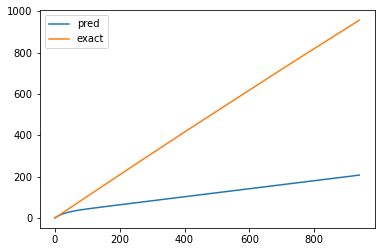

In [109]:

i = 940*3
j = i +940
plt.plot(y_p[i:j],label='pred')
plt.plot(y_test[i:j],label='exact')
plt.legend()